Summary Statistics
===

This notebook retrieves summary statsitics on restoration and protection. Summary stats include: area, practice type, practice count, cummulative reduction. 

Projection is broken down into DRWI protection and non-DRWI protection. Restoration summary tables include direct (restoration fund), indirect (operational and watershed conservation funds), PA DEP BMPs, & PA & NJ county-level restoration.

# Setup

## Load packages

In [1]:
# Import packages
from pathlib import Path
from importlib import reload

import pandas as pd
import geopandas as gpd

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
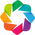

In [2]:
# Import PA custom functions
import pollution_assessment as pa
from pollution_assessment import summary_stats

In [3]:
# If kernel has not been restarted, restart before running this cell
# Confirm that this repo is in your Python Path
# !conda-develop "/Users/clulay/OneDrive - LimnoTech/Documents/GitHub/pollution-assessment/src"
# !conda-develop "R:\\WilliamPenn_Delaware River\\PollutionAssessment\\GitHub\\src"

## Paths

In [4]:
# Find your current working directory, which should be folder for this notebook.
Path.cwd()

PosixPath('/Users/aaufdenkampe/Documents/Python/pollution-assessment/stage2')

In [5]:
# Set your project directory to your local folder for your clone of this repository
project_path = Path.cwd().parent
project_path

PosixPath('/Users/aaufdenkampe/Documents/Python/pollution-assessment')

# Load data

In [6]:
# Files created by Sara Damiano on 2023-05-16
# These are data straight out of FieldDocs
fd_protec_gdf_20230516 = gpd.read_parquet(project_path / Path('stage2/private/protection_bmps_from_FieldDoc_20230516.parquet'))
fd_rest_gdf_20230516 = gpd.read_parquet(project_path / Path('stage2/private/restoration_bmps_from_FieldDoc_20230516.parquet'))

# Files created by Sara Damiano on 2022-11-02
# These are data straight out of FieldDocs
fd_protec_gdf_20221102 = gpd.read_parquet(project_path / Path('stage2/private/protection_bmps_from_FieldDoc_20221102.parquet'))
fd_rest_gdf_20221102 = gpd.read_parquet(project_path / Path('stage2/private/restoration_bmps_from_FieldDoc_20221102.parquet'))

# # Files created by Mike Campagna on 2022-11-08
# # These are data from FieldDocs that have been processed into the Academy's 
# # database and re-exported 
fd_protec_gdf_20221108 = gpd.read_parquet(project_path / Path('stage2/private/protection_df_110822.parquet'))
fd_rest_gdf_20221108 = gpd.read_parquet(project_path / Path('stage2/private/restoration_df_110822.parquet'))

wcpa_protec_gdf = gpd.read_parquet(project_path / Path('stage2/Protected_Lands/WCPA_exclude_DRWI.parquet'))

# # PA & NJ Ag & Dev
PA_NJ_dev = pd.read_csv(project_path / Path('stage2/private/PA_NJ_DevLoadReduction.csv'))
PA_NJ_ag = pd.read_csv(project_path / Path('stage2/private/PA_NJ_AgLoadReduction.csv'))
PADEP_BMPS = pd.read_csv(project_path / Path('stage2/private/PADEP_BMPs.csv'))

# # PA & NJ FIPS
PA_NJ_FIPS = pd.read_csv(project_path / Path('geography/PA_NJ_FIPS.csv'))

In [7]:
fd_dtypes = {
    'practice_id': 'category',
    'practice_name': 'category',
    'program_name': 'category',
    'organization': 'category',
    'description': 'category',
    'practice_type': 'category',
    'created_at': 'category',
    'modified_at': 'category'
}

fd_protec_gdf_20221102 = fd_protec_gdf_20221102.astype(fd_dtypes)
fd_rest_gdf_20221102 = fd_rest_gdf_20221102.astype(fd_dtypes)

# Set CRS

Convert to equal area crs to compute area. The FieldDoc exports do not have a projection assigned. Previous FieldDoc exports had a projection of EPSG 4326 applied. This projection must first be assigned to the FieldDoc gdfs, then the gdfs can be converted to equal area crs.

In [8]:
gdf_list = [fd_protec_gdf_20230516, fd_rest_gdf_20230516, 
            fd_protec_gdf_20221102, fd_rest_gdf_20221102, 
            fd_protec_gdf_20221108, fd_rest_gdf_20221108,
            ]

for item in gdf_list:
    item.set_crs(epsg=4326, allow_override=True, inplace=True)

In [9]:
gdf_list = [fd_protec_gdf_20230516, fd_rest_gdf_20230516, 
            fd_protec_gdf_20221102, fd_rest_gdf_20221102, 
            wcpa_protec_gdf, 
            # fd_protec_gdf_20221108, fd_rest_gdf_20221108,
            ]

for item in gdf_list:
    item.to_crs(crs='ESRI:102003', inplace=True)

# Summary stats

## FieldDoc protection

There was no difference between the nov 8 fielddoc protection and the prior fielddoc protection summary.

In [10]:
fd_protec_gdf_20230516.info()
fd_protec_gdf_20230516

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   practice_name  75 non-null     object  
 1   practice_id    75 non-null     int64   
 2   program_name   75 non-null     object  
 3   program_id     75 non-null     int64   
 4   organization   75 non-null     object  
 5   project_name   75 non-null     object  
 6   project_id     75 non-null     int64   
 7   description    26 non-null     object  
 8   practice_type  75 non-null     object  
 9   created_at     75 non-null     object  
 10  modified_at    75 non-null     object  
 11  tot_pwr        75 non-null     float64 
 12  head_pwr       75 non-null     float64 
 13  nat_land       75 non-null     float64 
 14  ara_pwr        75 non-null     float64 
 15  wet_pwr        75 non-null     float64 
 16  dev_land       75 non-null     float64 
 17  ag_land        75 non-null   

,practice_name,practice_id,program_name,program_id,organization,project_name,project_id,description,practice_type,created_at,modified_at,tot_pwr,head_pwr,nat_land,ara_pwr,wet_pwr,dev_land,ag_land,str_bank,geometry
0,Bartolacci,5301,Delaware River Watershed Protection Fund - For...,5,Natural Lands Trust,Bartolacci,2677,Land Protection \n\nShapefile needs to be load...,Conservation easement,2019-01-14T20:29:48.955938Z,2020-12-21T18:28:07.158142Z,26.00,0.00,39.31,25.94,8.59,0.02,0.00,0.43,"POLYGON ((1716567.299 594970.258, 1716465.259 ..."
1,Pocono Mountain Bluestone,5302,Delaware River Watershed Protection Fund - For...,5,Natural Lands Trust,Pocono Mountain Bluestone,2678,Land Protection,Conservation easement,2019-01-14T20:35:20.889852Z,2021-07-19T13:56:40.756288Z,76.96,2.32,271.32,72.70,8.09,10.90,0.00,1.34,"MULTIPOLYGON (((1715822.576 593394.762, 171579..."
2,Easement Acquisition,5337,Delaware River Watershed Protection Fund - For...,5,The Commons,16 Years LLC Project,2695,None,Conservation easement,2019-01-18T16:36:17.047255Z,2021-07-07T17:30:23.422991Z,98.35,98.35,16.46,32.17,0.00,1.33,80.73,0.66,"MULTIPOLYGON (((1709434.906 479589.595, 170961..."
3,Acquisition,5431,Delaware River Watershed Protection Fund - For...,5,The Land Conservancy of New Jersey,Cranberry Overlook Greenway,2723,None,Fee acquisition,2019-01-25T16:48:57.618083Z,2021-03-25T18:38:01.119992Z,44.82,44.82,45.15,0.07,0.00,0.22,0.00,0.00,"POLYGON ((1761634.555 585459.873, 1761684.726 ..."
4,Yards Creek Preserve Phase I - Subject,5436,Delaware River Watershed Protection Fund - For...,5,The Land Conservancy of New Jersey,Yards Creek Preserve Phase I,2707,None,Fee acquisition,2019-01-25T18:36:23.757416Z,2021-03-25T18:34:49.498465Z,113.52,113.52,114.78,71.13,22.75,0.22,0.00,1.34,"POLYGON ((1737396.549 586908.363, 1737545.386 ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,Yards Creek Preserve Phase VI,55055,Delaware River Watershed Protection Fund - For...,5,The Land Conservancy of New Jersey,Yards Creek Preserve Phase VI,6694,The project is located in the NJ Highlands Clu...,Fee acquisition,2022-01-05T17:29:46.294169Z,2022-09-30T19:57:29.744369Z,15.13,15.13,14.68,3.87,0.00,0.00,0.00,0.00,"POLYGON ((1737945.891 585578.516, 1738012.809 ..."
71,Porters Lake Hunting & Fishing Club - Subject ...,55080,Delaware River Watershed Protection Fund - For...,5,Delaware Highlands Conservancy,Porters Lake Hunting & Fishing Club,5238,Proposed conservation easement area for the gr...,Conservation easement,2022-01-10T17:29:30.832356Z,2022-01-19T15:41:57.085338Z,1928.49,1127.10,2781.94,1278.78,403.40,3.78,0.00,14.62,"MULTIPOLYGON (((1726391.470 610948.148, 172656..."
72,Mill Creek Fen - Subject - Easement,55287,Delaware River Watershed Protection Fund - For...,5,Pocono Heritage Land Trust,Mill Creek Fen,5967,29 acres in Barrett Twp.,Conservation easement,2022-01-21T14:09:20.371728Z,2022-01-21T16:09:43.912661Z,23.62,0.00,33.14,22.88,4.31,0.00,0.00,0.58,"MULTIPOLYGON (((1712973.498 597745.833, 171284..."
73,Bear Creek: Pinchot Forest Addition,55397,Delaware River Watershed Protection Fund - For...,5,The Nature Conservancy,Bear Creek,6719,None,Fee acquisition,2022-01-27T16:55:22.172988Z,2022-08-10T16:58:55.658461Z,94.93,94.93,95.85,8.21,3.58,0.00,0.00,0.06,"POLYGON ((1679046.498 598153.282, 1679275.059 ..."


### Compare project counts from Nov2 to Nov8

In [11]:
fd_protec_gdf_20221108 = fd_protec_gdf_20221108.reset_index()

In [12]:
protec_no_dup_20221108 = fd_protec_gdf_20221108.drop_duplicates(subset='practice_id', keep='first')

In [13]:
protec_no_dup_20230516 = fd_protec_gdf_20230516.drop_duplicates(subset='practice_id', keep='first')
protec_no_dup_20221102 = fd_protec_gdf_20221102.drop_duplicates(subset='practice_id', keep='first')

In [14]:
# Compare project count from Nov2 to Nov8 export
#print(len(protec_no_dup_20221108))
print(len(protec_no_dup_20221102))
print(len(protec_no_dup_20230516))

75
75


### Protection summaries

In [15]:
fd_protec_summary_20221108 = pa.summary_stats.summary_stats(fd_protec_gdf_20221108)
fd_protec_summary_20221108

/Users/aaufdenkampe/Documents/Python/pollution-assessment/src/pollution_assessment/summary_stats.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count = condensed_gdf.groupby('practice_type')['practice_id'].count()
/Users/aaufdenkampe/Documents/Python/pollution-assessment/src/pollution_assessment/summary_stats.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  area = round(gdf.groupby('practice_type')['area_ac'].sum(),2)


,practice_count,area_ac
practice_type,,
Conservation easement,37,21718.02
Fee acquisition,38,4675.72
TOTAL,75,26393.74


In [16]:
fd_protec_summary_20221102 = pa.summary_stats.summary_stats(fd_protec_gdf_20221102)
fd_protec_summary_20221102

/Users/aaufdenkampe/Documents/Python/pollution-assessment/src/pollution_assessment/summary_stats.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count = condensed_gdf.groupby('practice_type')['practice_id'].count()
/Users/aaufdenkampe/Documents/Python/pollution-assessment/src/pollution_assessment/summary_stats.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  area = round(gdf.groupby('practice_type')['area_ac'].sum(),2)


,practice_count,area_ac
practice_type,,
Conservation easement,37,21717.96
Fee acquisition,38,4675.72
TOTAL,75,26393.68


In [17]:
fd_protec_summary_20230516 = pa.summary_stats.summary_stats(fd_protec_gdf_20230516)
fd_protec_summary_20230516

,practice_count,area_ac
practice_type,,
Conservation easement,37,21717.96
Fee acquisition,38,4675.72
TOTAL,75,26393.68


## WCPA protection

In [18]:
len(wcpa_protec_gdf)

22137

In [19]:
wcpa_protec_summary = pa.summary_stats.summary_stats(wcpa_protec_gdf)
wcpa_protec_summary

/Users/aaufdenkampe/Documents/Python/pollution-assessment/src/pollution_assessment/summary_stats.py:37: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count = gdf.groupby('RECLASS2')['OBJECTID'].count()
/Users/aaufdenkampe/Documents/Python/pollution-assessment/src/pollution_assessment/summary_stats.py:38: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  area = round(gdf.groupby('RECLASS2')['area_ac'].sum(),2)


,practice_count,area_ac
Agricultural Easement,5381,454105.48
Conservation Easement,3498,242667.25
Natural Resource Area - Federal,118,55583.20
Natural Resource Area - Local,4183,113308.77
Natural Resource Area - Private,1606,111332.82
Natural Resource Area - State,1703,772577.74
Park or Recreation Area - Federal,18,96156.22
Park or Recreation Area - Local,4903,174631.07
Park or Recreation Area - Private,173,6181.22
Park or Recreation Area - State,554,119183.87


## FieldDoc restoration
NOTE: Units are lbs/y for TN, TP, TSS 

### Compare project counts and loads from Nov2 to Nov8

In [20]:
fd_rest_gdf_20221108.reset_index(inplace=True)

In [21]:
# Totals in kg/y, for "WPF Directly-funded"
# Nov 8 version
fd_rest_gdf_20221108[fd_rest_gdf_20221108['program_name'] == 'Delaware River Restoration Fund'].tp.sum() /2.20462

17543.735428327785

In [22]:
# Totals in kg/y, for "WPF Directly-funded"
# Approx Nov 2 version
fd_rest_gdf_20221102[fd_rest_gdf_20221102['program_name'] == 'Delaware River Restoration Fund'].tp.sum() /2.20462

17540.002358683134

In [23]:
# Totals in kg/y, for "WPF Directly-funded"
# Approx Nov 2 version
fd_rest_gdf_20230516[fd_rest_gdf_20230516['program_name'] == 'Delaware River Restoration Fund'].tp.sum() /2.20462

20109.6288702815

In [24]:
# Replace any NAs in the practice_type column with 'Not Specified'
fd_rest_gdf_20230516['practice_type'] = fd_rest_gdf_20230516['practice_type'].astype('object')
fd_rest_gdf_20230516['practice_type'].fillna('Not Specified', inplace=True)
fd_rest_gdf_20230516['practice_type'] = fd_rest_gdf_20230516['practice_type'].astype('category')

fd_rest_gdf_20221102['practice_type'] = fd_rest_gdf_20221102['practice_type'].astype('object')
fd_rest_gdf_20221102['practice_type'].fillna('Not Specified', inplace=True)
fd_rest_gdf_20221102['practice_type'] = fd_rest_gdf_20221102['practice_type'].astype('category')

In [25]:
# Identify if any NAs exist in the Nov8 practice_type column
len(fd_rest_gdf_20221108[fd_rest_gdf_20221108['practice_type'].isnull()])

0

In [26]:
# Isolate direct and indirect practices from Nov2 data
direct_fd_rest_20230516 = fd_rest_gdf_20230516[fd_rest_gdf_20230516['program_name'] == 'Delaware River Restoration Fund']
direct_fd_rest_20221102 = fd_rest_gdf_20221102[fd_rest_gdf_20221102['program_name'] == 'Delaware River Restoration Fund']

indirect_list = ['Delaware River Operational Fund', 'Delaware Watershed Conservation Fund']
indirect_fd_rest_20230516 = fd_rest_gdf_20230516[fd_rest_gdf_20230516['program_name'].isin(indirect_list)]
indirect_fd_rest_20221102 = fd_rest_gdf_20221102[fd_rest_gdf_20221102['program_name'].isin(indirect_list)]

In [27]:
# Isolate direct and indirect practices from Nov8 data
direct_fd_rest_20221108 = fd_rest_gdf_20221108[fd_rest_gdf_20221108['program_name'] == 'Delaware River Restoration Fund']

indirect_list = ['Delaware River Operational Fund', 'Delaware Watershed Conservation Fund']
indirect_fd_rest_20221108 = fd_rest_gdf_20221108[fd_rest_gdf_20221108['program_name'].isin(indirect_list)]

In [28]:
indirect_no_dup_20230516 = indirect_fd_rest_20230516.drop_duplicates(
    subset="practice_id", keep="first"
)
print(
    "2023-05-16 Indirect Practices:",
    "Total:",
    len(indirect_fd_rest_20230516),
    "Deduplicated:",
    len(indirect_no_dup_20230516),
)

indirect_no_dup_20221102 = indirect_fd_rest_20221102.drop_duplicates(
    subset="practice_id", keep="first"
)
print(
    "2022-11-02 Indirect Practices:",
    "Total:",
    len(indirect_fd_rest_20221102),
    "Deduplicated:",
    len(indirect_no_dup_20221102),
)

2023-05-16 Indirect Practices: Total: 137 Deduplicated: 137
2022-11-02 Indirect Practices: Total: 146 Deduplicated: 146


In [29]:
indirect_no_dup_20221108 = indirect_fd_rest_20221108.drop_duplicates(subset='practice_id', keep='first')
print(
    "2022-11-08 Indirect Practices:",
    "Total:",
    len(indirect_fd_rest_20221108),
    "Deduplicated:",
    len(indirect_no_dup_20221108),
)

2022-11-08 Indirect Practices: Total: 312 Deduplicated: 139


In [30]:
print("2023-05-16 Indirect Practices:",len(indirect_no_dup_20230516))
print("2022-11-02 Indirect Practices:",len(indirect_no_dup_20221102))
#print(len(indirect_no_dup_20221108))

2023-05-16 Indirect Practices: 137
2022-11-02 Indirect Practices: 146


In [31]:
direct_no_dup_20221108 = direct_fd_rest_20221108.drop_duplicates(subset='practice_id', keep='first')

In [32]:
direct_no_dup_20230516 = direct_fd_rest_20230516.drop_duplicates(subset='practice_id', keep='first')
print(
    "2023-05-16 Direcrt Practices:",
    "Total:",
    len(direct_fd_rest_20230516),
    "Deduplicated:",
    len(direct_no_dup_20230516),
)
direct_no_dup_20221102 = direct_fd_rest_20221102.drop_duplicates(subset='practice_id', keep='first')
print(
    "2022-11-08 Direct Practices:",
    "Total:",
    len(direct_fd_rest_20221102),
    "Deduplicated:",
    len(direct_no_dup_20221102),
)

2023-05-16 Direcrt Practices: Total: 1304 Deduplicated: 1304
2022-11-08 Direct Practices: Total: 1074 Deduplicated: 1074


In [33]:
print("2023-05-16 Direct Practices:",len(direct_no_dup_20230516))
print("2022-11-02 Direct Practices:",len(direct_no_dup_20221102))
#print("2022-11-08 Direct Practices:",len(direct_no_dup_20221108))

2023-05-16 Direct Practices: 1304
2022-11-02 Direct Practices: 1074


### Restoration summaries

In [34]:
fd_rest_gdf_20221108['program_name'].unique()

['Delaware River Restoration Fund', 'Delaware River Operational Fund', 'Delaware Watershed Conservation Fund']
Categories (3, object): ['Delaware River Operational Fund', 'Delaware River Restoration Fund', 'Delaware Watershed Conservation Fund']

In [35]:
# Rename geom column to geometry so summary_stats will run correctly
fd_rest_gdf_20221108 = fd_rest_gdf_20221108.rename(columns={'geom':'geometry'})
fd_rest_gdf_20221108 = fd_rest_gdf_20221108.set_geometry('geometry')

In [36]:
fd_rest_gdf_20221108.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1821 entries, 0 to 1820
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   comid          1821 non-null   int64              
 1   practice_id    1821 non-null   int64              
 2   huc12          1821 non-null   category           
 3   practice_name  1821 non-null   category           
 4   program_name   1821 non-null   category           
 5   program_id     1821 non-null   int64              
 6   organization   1821 non-null   category           
 7   description    1821 non-null   category           
 8   practice_type  1821 non-null   category           
 9   created_at     1821 non-null   datetime64[us, UTC]
 10  modified_at    1821 non-null   datetime64[us, UTC]
 11  tn             1821 non-null   float64            
 12  tp             1821 non-null   float64            
 13  tss            1821 non-null   float64  

In [37]:
indirect_rest_summary_20230516 = pa.summary_stats.summary_stats(indirect_fd_rest_20230516, rest=True)
indirect_rest_summary_20230516

/Users/aaufdenkampe/miniconda3/envs/drwi_pa/lib/python3.11/site-packages/geopandas/geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/aaufdenkampe/Documents/Python/pollution-assessment/src/pollution_assessment/summary_stats.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count = condensed_gdf.groupby('practice_type')['practice_id'].count()
/Users/aaufdenkampe/Documents/Python/pollution-assessment/src/pollution_assessment/summary_stats.py:45: FutureWarning: The default of observed=False is deprecate

,practice_count,area_ac,tn_load_reduced,tp_load_reduced,tss_load_reduced
practice_type,,,,,
Animal Waste Management System,1,0.00,0.00,0.00,0.00
Barnyard Runoff Control,1,0.59,0.00,0.00,0.00
"Bioretention/rain gardens - A/B soils, no underdrain",1,0.07,0.00,0.00,0.00
Conservation Cover,4,19.38,7.70,3.47,1492.81
Conservation easement,25,3427.71,0.00,0.00,0.00
Cover Crop,24,4932.02,0.00,0.00,0.00
Dry Extended Detention Ponds,1,0.59,0.00,0.00,0.00
Fee acquisition,19,5455.92,0.00,0.00,0.00
Forest Buffer,8,66.84,992.37,101.97,51767.03


In [38]:
indirect_rest_summary_20221102 = pa.summary_stats.summary_stats(indirect_fd_rest_20221102, rest=True)
indirect_rest_summary_20221102

/Users/aaufdenkampe/miniconda3/envs/drwi_pa/lib/python3.11/site-packages/geopandas/geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/aaufdenkampe/Documents/Python/pollution-assessment/src/pollution_assessment/summary_stats.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count = condensed_gdf.groupby('practice_type')['practice_id'].count()
/Users/aaufdenkampe/Documents/Python/pollution-assessment/src/pollution_assessment/summary_stats.py:45: FutureWarning: The default of observed=False is deprecate

,practice_count,area_ac,tn_load_reduced,tp_load_reduced,tss_load_reduced
practice_type,,,,,
Animal Waste Management System,1,0.00,0.00,0.00,0.00
Barnyard Runoff Control,6,0.76,0.00,0.00,0.00
"Bioretention/rain gardens - A/B soils, no underdrain",1,0.07,0.00,0.00,0.00
Bioretention/raingarden - C/D soils no underdrain,1,0.01,0.00,0.00,0.00
Conservation Cover,4,19.38,7.70,3.47,1492.81
Conservation easement,25,3427.71,0.00,0.00,0.00
Cover Crop,24,4932.02,0.00,0.00,0.00
Dry Extended Detention Ponds,1,0.59,0.00,0.00,0.00
Erosion and Sediment Control Level 1,1,0.11,0.00,0.00,0.00


In [39]:
indirect_rest_summary_20221108 = pa.summary_stats.summary_stats(indirect_fd_rest_20221108, rest=True)
indirect_rest_summary_20221108

/Users/aaufdenkampe/Documents/Python/pollution-assessment/src/pollution_assessment/summary_stats.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count = condensed_gdf.groupby('practice_type')['practice_id'].count()
/Users/aaufdenkampe/Documents/Python/pollution-assessment/src/pollution_assessment/summary_stats.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  area = round(gdf.groupby('practice_type')['area_ac'].sum(),2)
/Users/aaufdenkampe/Documents/Python/pollution-assessment/src/pollution_assessment/summary_stats.py:48: FutureWarning: The default of observed=False is deprecated and will be changed t

,practice_count,area_ac,tn_load_reduced,tp_load_reduced,tss_load_reduced
practice_type,,,,,
Animal Waste Management System,1,0.00,0.00,0.00,0.00
Barnyard Runoff Control,6,0.76,0.00,0.00,0.00
"Bioretention/rain gardens - A/B soils, no underdrain",1,0.07,0.00,0.00,0.00
Bioretention/raingarden - C/D soils no underdrain,1,0.01,0.00,0.00,0.00
Conservation Cover,4,19.38,7.70,3.47,1492.81
Conservation easement,25,3427.71,0.00,0.00,0.00
Cover Crop,24,4932.02,0.00,0.00,0.00
Dry Extended Detention Ponds,1,0.59,0.00,0.00,0.00
Erosion and Sediment Control Level 1,1,0.11,0.00,0.00,0.00


In [40]:
direct_rest_summary_20230516 = pa.summary_stats.summary_stats(direct_fd_rest_20230516, rest=True)
direct_rest_summary_20230516

/Users/aaufdenkampe/miniconda3/envs/drwi_pa/lib/python3.11/site-packages/geopandas/geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/aaufdenkampe/Documents/Python/pollution-assessment/src/pollution_assessment/summary_stats.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count = condensed_gdf.groupby('practice_type')['practice_id'].count()
/Users/aaufdenkampe/Documents/Python/pollution-assessment/src/pollution_assessment/summary_stats.py:45: FutureWarning: The default of observed=False is deprecate

,practice_count,area_ac,tn_load_reduced,tp_load_reduced,tss_load_reduced
practice_type,,,,,
Access Control,2,207.10,0.00,0.00,0.00
Access Road,13,0.00,0.00,0.00,0.00
Alternative Crops,1,0.77,0.00,0.00,0.00
Animal Mortality Facility,2,0.00,0.00,0.00,0.00
Aquatic Organism Passage,1,1.09,0.00,0.00,0.00
...,...,...,...,...,...
Wet Pond,1,0.20,52.74,26.49,35413.76
Wetland Creation - Floodplain,3,1.92,15.52,7.50,6102.97
Wetland Restoration,4,10.26,36.56,21.47,12990.63


In [41]:
direct_rest_summary_20221102 = pa.summary_stats.summary_stats(direct_fd_rest_20221102, rest=True)
direct_rest_summary_20221102

/Users/aaufdenkampe/miniconda3/envs/drwi_pa/lib/python3.11/site-packages/geopandas/geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/aaufdenkampe/Documents/Python/pollution-assessment/src/pollution_assessment/summary_stats.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count = condensed_gdf.groupby('practice_type')['practice_id'].count()
/Users/aaufdenkampe/Documents/Python/pollution-assessment/src/pollution_assessment/summary_stats.py:45: FutureWarning: The default of observed=False is deprecate

,practice_count,area_ac,tn_load_reduced,tp_load_reduced,tss_load_reduced
practice_type,,,,,
Access Control,2,207.10,0.00,0.00,0.00
Access Road,9,0.00,0.00,0.00,0.00
Animal Mortality Facility,2,0.00,0.00,0.00,0.00
Aquatic Organism Passage,1,1.09,0.00,0.00,0.00
Barnyard Runoff Controls,11,61.07,52.55,16.19,11715.06
...,...,...,...,...,...
Wet Pond,1,0.20,52.74,26.49,35413.76
Wetland Creation - Floodplain,1,0.33,0.17,0.08,30.13
Wetland Restoration,3,10.08,36.44,21.44,12978.44


In [42]:
direct_rest_summary_20221108 = pa.summary_stats.summary_stats(direct_fd_rest_20221108, rest=True)
direct_rest_summary_20221108

/Users/aaufdenkampe/Documents/Python/pollution-assessment/src/pollution_assessment/summary_stats.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count = condensed_gdf.groupby('practice_type')['practice_id'].count()
/Users/aaufdenkampe/Documents/Python/pollution-assessment/src/pollution_assessment/summary_stats.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  area = round(gdf.groupby('practice_type')['area_ac'].sum(),2)
/Users/aaufdenkampe/Documents/Python/pollution-assessment/src/pollution_assessment/summary_stats.py:48: FutureWarning: The default of observed=False is deprecated and will be changed t

,practice_count,area_ac,tn_load_reduced,tp_load_reduced,tss_load_reduced
practice_type,,,,,
Access Control,1,207.10,0.00,0.00,0.00
Access Road,1,0.00,0.00,0.00,0.00
Aquatic Organism Passage,1,1.10,0.00,0.00,0.00
Barnyard Runoff Controls,10,61.07,52.55,16.19,11715.06
Bioretention,34,2.03,1059.13,322.19,1235219.94
...,...,...,...,...,...
Wet Pond,1,0.20,52.74,26.49,35413.76
Wetland Creation - Floodplain,1,0.33,0.17,0.08,30.13
Wetland Restoration,3,10.08,36.44,21.44,12978.44


## PA NJ BMPs

In [43]:
PADEP_BMPS_summary = pa.summary_stats.PADEP_BMPS_summary_stats(PADEP_BMPS)
PADEP_BMPS_summary

,area_ac,tn_load_reduced,tp_load_reduced,tss_load_reduced,length_ft,id_count
bmp/practice,,,,,,
Bioretention/raingardens - C/D soils underdrain,5.00,3.00,3.50,3.75,NaN,1.0
Dry Extended Detention Ponds,9.81,3.34,5.49,6.67,NaN,3.0
Fence,71215.00,1424.30,284.86,181598.25,71215.0,24.0
Grassed Waterway,400.00,164.00,160.00,216.00,400.0,2.0
Grazing Land Protection,5.00,1.50,1.50,1.50,NaN,1.0
Heavy Use Area Protection,0.03,0.00,0.00,0.00,NaN,1.0
Permeable Pavement w/o Sand Veg. - A/B soils no underdrain,0.66,0.40,0.46,0.50,NaN,1.0
Riparian Forest Buffer,191.83,78.65,76.73,103.59,NaN,49.0
Soil Conservation and Water Quality Plans,32.00,3.20,3.20,3.20,NaN,1.0


## PA NJ County level load reductions

In [44]:
PA_NJ_dev = PA_NJ_dev.set_index('comid')
PA_NJ_ag = PA_NJ_ag.set_index('comid')

In [45]:
PA_NJ_rest_df = PA_NJ_dev.merge(PA_NJ_ag, left_index=True, right_index=True, how='outer')

In [46]:
PA_NJ_rest_df['state_FIPS'] = PA_NJ_rest_df['statefp_x']
PA_NJ_rest_df['county_FIPS_suff'] = PA_NJ_rest_df['countyfp_x']

In [47]:
PA_NJ_rest_df['county_FIPS_suff'].fillna(PA_NJ_rest_df['countyfp_y'], inplace=True)
PA_NJ_rest_df['state_FIPS'].fillna(PA_NJ_rest_df['statefp_y'], inplace=True)

In [48]:
PA_NJ_rest_df = PA_NJ_rest_df.drop(['statefp_x', 'countyfp_x', 'statefp_y', 'countyfp_y'], axis=1)

In [49]:
PA_NJ_rest_df = PA_NJ_rest_df.astype({'state_FIPS': 'int64',
                                      'county_FIPS_suff': 'int64'})

In [50]:
PA_NJ_rest_df = PA_NJ_rest_df.astype({'state_FIPS': 'string',
                                      'county_FIPS_suff': 'string'})

In [51]:
county_FIPS = {'comid': [], 'county_FIPS': []}

for i, row in PA_NJ_rest_df.iterrows():
    FIPS_len = len(row[6] + row[7])
    if FIPS_len == 4:
        county_FIP = row[6] + "0" + row[7]
    
    elif FIPS_len == 3:
        county_FIP = row[6] + "00" + row[7]
    
    else:
        county_FIP = row[6] + row[7]
    
    county_FIPS['comid'].append(i)
    county_FIPS['county_FIPS'].append(county_FIP)

county_FIPS_df = pd.DataFrame(county_FIPS)
county_FIPS_df.set_index('comid', inplace=True)

/var/folders/tx/14mbtmrs0rq2b6mkfxdh54r00000gp/T/ipykernel_98297/4105369146.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  FIPS_len = len(row[6] + row[7])
/var/folders/tx/14mbtmrs0rq2b6mkfxdh54r00000gp/T/ipykernel_98297/4105369146.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  county_FIP = row[6] + "0" + row[7]
/var/folders/tx/14mbtmrs0rq2b6mkfxdh54r00000gp/T/ipykernel_98297/4105369146.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `s

In [52]:
PA_NJ_rest_df = PA_NJ_rest_df.merge(county_FIPS_df, left_index=True, right_index=True, how='left')

In [53]:
PA_NJ_rest_df['county_FIPS'].unique()

array(['34037', '34041', '34027', '34019', '42095', '42017', '34021',
       '34025', '42103', '42127', '42069', '42089', '42079', '42025',
       '42107', '42077', '42011', '34005', '34029', '42091', '42101',
       '42045', '42029', '34007', '34015', '42071', '42075', '34001',
       '34011', '34009', '34033'], dtype=object)

In [54]:
PA_NJ_rest_df = PA_NJ_rest_df.astype({'state_FIPS': 'category',
                                      'county_FIPS': 'category'})

In [55]:
PA_NJ_rest_df.reset_index(inplace=True)

In [60]:
PA_NJ_rest_df.info()
PA_NJ_rest_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10338 entries, 0 to 10337
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   comid                  10338 non-null  int64   
 1   tn_dev_reduction_lbs   8348 non-null   float64 
 2   tp_dev_reduction_lbs   8348 non-null   float64 
 3   tss_dev_reduction_lbs  8348 non-null   float64 
 4   tn_ag_reduction_lbs    8624 non-null   float64 
 5   tp_ag_reduction_lbs    8624 non-null   float64 
 6   tss_ag_reduction_lbs   8624 non-null   float64 
 7   state_FIPS             10338 non-null  category
 8   county_FIPS_suff       10338 non-null  string  
 9   county_FIPS            10338 non-null  category
dtypes: category(2), float64(6), int64(1), string(1)
memory usage: 667.9 KB


,comid,tn_dev_reduction_lbs,tp_dev_reduction_lbs,tss_dev_reduction_lbs,tn_ag_reduction_lbs,tp_ag_reduction_lbs,tss_ag_reduction_lbs,state_FIPS,county_FIPS_suff,county_FIPS
0,2583185,0.0083,0.0014,0.6840,NaN,NaN,NaN,34,37,34037
1,2583187,0.0021,0.0004,0.1730,NaN,NaN,NaN,34,37,34037
2,2583189,0.0861,0.0147,7.9326,NaN,NaN,NaN,34,37,34037
3,2583191,0.0477,0.0082,4.3133,NaN,NaN,NaN,34,37,34037
4,2583193,0.0242,0.0042,2.0793,NaN,NaN,NaN,34,37,34037


In [72]:
PA_NJ_FIPS.info()
PA_NJ_FIPS.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   FIPS       88 non-null     int64 
 1   County     88 non-null     object
 2   StateFIPS  88 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 2.2+ KB


,FIPS,County,StateFIPS
0,34001,Atlantic County,34
1,34003,Bergen County,34
2,34005,Burlington County,34
3,34007,Camden County,34
4,34009,Cape May County,34


In [71]:
PA_NJ_FIPS['StateFIPS'] = (PA_NJ_FIPS.FIPS/1000).astype(int)

In [73]:
PA_NJ_rest_summary = pa.summary_stats.PA_NJ_rest_summary_stats(PA_NJ_rest_df, PA_NJ_FIPS)
PA_NJ_rest_summary

/Users/aaufdenkampe/Documents/Python/pollution-assessment/src/pollution_assessment/summary_stats.py:170: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count = df.groupby('county_FIPS')['comid'].count()
/Users/aaufdenkampe/Documents/Python/pollution-assessment/src/pollution_assessment/summary_stats.py:172: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ag_tn_load_reduced = round(df.groupby('county_FIPS')['tn_ag_reduction_lbs'].sum(),2)
/Users/aaufdenkampe/Documents/Python/pollution-assessment/src/pollution_assessment/summary_stats.py:173: FutureWarning: The default of observed=False is deprecated and will be ch

,comid_count,tn_ag_reduction_lbs,tp_ag_reduction_lbs,tss_ag_reduction_lbs,tn_dev_reduction_lbs,tp_dev_reduction_lbs,tss_dev_reduction_lbs,StateFIPS
Atlantic County,304,0.47,0.29,15.14,107.50,18.25,9941.24,34.0
Burlington County,653,11.03,6.58,288.99,310.47,52.96,26954.67,34.0
Camden County,249,0.23,0.14,6.72,150.57,25.61,13263.91,34.0
Cape May County,152,0.00,0.00,0.00,35.91,6.10,3122.62,34.0
Cumberland County,446,5.32,2.49,250.38,63.30,10.76,5757.57,34.0
Gloucester County,391,36.85,23.78,2111.60,215.73,36.97,18306.97,34.0
Hunterdon County,134,203.61,187.53,33143.99,2.47,0.43,224.00,34.0
Mercer County,94,5.15,4.18,312.87,138.86,23.72,12359.12,34.0
Monmouth County,239,1.55,1.13,126.15,198.95,33.89,18300.35,34.0
Morris County,31,1.45,1.06,74.17,6.38,1.11,567.61,34.0


# Save to csv

In [57]:
fd_protec_gdf_20230516.drop(columns='geometry', inplace=True)
fd_protec_gdf_20230516.to_csv(project_path / 
    Path('stage2/private/protection_bmps_from_FieldDoc_20230516.csv')
)

In [74]:
fd_protec_summary_20230516.to_csv(project_path / Path('stage2/data_output/fd_protection_summary_20230516.csv'))
fd_protec_summary_20221108.to_csv(project_path / Path('stage2/data_output/fd_protection_summary_20221108.csv'))
fd_protec_summary_20221102.to_csv(project_path / Path('stage2/data_output/fd_protection_summary_20221102.csv'))

direct_rest_summary_20230516.to_csv(project_path / Path('stage2/data_output/direct_restoration_summary_20230516.csv'))
indirect_rest_summary_20230516.to_csv(project_path / Path('stage2/data_output/indirect_restoration_summary_20230516.csv'))
direct_rest_summary_20221108.to_csv(project_path / Path('stage2/data_output/direct_restoration_summary_20221108.csv'))
indirect_rest_summary_20221108.to_csv(project_path / Path('stage2/data_output/indirect_restoration_summary_20221108.csv'))
direct_rest_summary_20221102.to_csv(project_path / Path('stage2/data_output/direct_restoration_summary_20221102.csv'))
indirect_rest_summary_20221102.to_csv(project_path / Path('stage2/data_output/indirect_restoration_summary_20221102.csv'))

wcpa_protec_summary.to_csv(project_path / Path('stage2/data_output/wcpa_protection_summary.csv'))
PADEP_BMPS_summary.to_csv(project_path / Path('stage2/data_output/PADEP_BMPS_restoration_summary.csv'))
PA_NJ_rest_summary.to_csv(project_path / Path('stage2/data_output/PA_NJ_restoration_summary.csv'))